Build a regression model.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns



In [4]:
yelp_df = pd.read_csv(r"C:\Users\johnk\OneDrive\Desktop\Statistical-Modelling-Project\Statistical-Modelling-Project\notebooks\yelp_data.csv")
salvador_station_df = pd.read_csv(r"C:\Users\johnk\OneDrive\Desktop\Statistical-Modelling-Project\Statistical-Modelling-Project\notebooks\salvador_station.csv")

In [7]:
# Merge the datasets on 'station name'

merged_df = pd.merge(salvador_station_df, yelp_df, on='Station Name', how='left')

merged_result = merged_df.drop(columns=['Latitude_y', 'Longitude_y'])  # Retain lon_x and lat_x
merged_result.head()


                     Station Name  Latitude_x  Longitude_x  Free Bikes  \
0  27 - Praça Ana Lúcia Magalhães  -12.993338   -38.460908           3   
1  27 - Praça Ana Lúcia Magalhães  -12.993338   -38.460908           3   
2  27 - Praça Ana Lúcia Magalhães  -12.993338   -38.460908           3   
3  27 - Praça Ana Lúcia Magalhães  -12.993338   -38.460908           3   
4  27 - Praça Ana Lúcia Magalhães  -12.993338   -38.460908           3   

   Empty Slots  Latitude_y  Longitude_y  Search Term            Business Name  \
0            8  -12.993338   -38.460908  Restaurants            Mamma's House   
1            8  -12.993338   -38.460908  Restaurants               Acqua Café   
2            8  -12.993338   -38.460908  Restaurants   Riz Bistrot & Risottos   
3            8  -12.993338   -38.460908  Restaurants                  Vignoli   
4            8  -12.993338   -38.460908  Restaurants  Adam Cozinha Originária   

  Business Category  Business Rating                      Business A

,Station Name,Latitude_x,Longitude_x,Free Bikes,Empty Slots,Search Term,Business Name,Business Category,Business Rating,Business Address,Business Phone,Business Distance (meters)
0,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,3,8,Restaurants,Mamma's House,Restaurants,4.9,"R. das Margaridas,150",5.571335e+11,527.483624
1,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,3,8,Restaurants,Acqua Café,Restaurants,4.3,"R. das Hortências, 600 - Pituba",5.571336e+11,47.248643
2,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,3,8,Restaurants,Riz Bistrot & Risottos,Restaurants,3.9,"R. das Hortênsias, 966",5.571302e+11,328.793942
3,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,3,8,Restaurants,Vignoli,Restaurants,4.4,"Av. Paulo VI, 1659",5.571302e+11,490.866547
4,27 - Praça Ana Lúcia Magalhães,-12.993338,-38.460908,3,8,Restaurants,Adam Cozinha Originária,Restaurants,4.6,"R. Edith Mendes da Gama e Abreu, 189",5.571351e+11,208.535935


In [12]:
# Select relevant columns for the regression model
# Assuming 'empty slots', 'free bikes', 'business distance', and 'business rating' are present in the merged dataset
X = merged_result[['Empty Slots', 'Free Bikes', 'Business Distance (meters)']]  # Independent variables
y = merged_result['Business Rating']  # Dependent variable (target)

# Check for missing values
print("Missing values in the features:")
print(X.isnull().sum())

print("Missing values in the target:")
print(y.isnull().sum())

# Handle missing values (we can drop rows with missing target or fill missing features)
merged_df.dropna(subset=['Business Rating'], inplace=True)  # Drop rows with missing target
X = merged_result[['Empty Slots', 'Free Bikes', 'Business Distance (meters)']]  # Re-select features after drop
y = merged_result['Business Rating']

# Check data types to make sure they're numerical
print("Data types of features and target:")
print(X.dtypes)
print(y.dtypes)


Missing values in the features:
Empty Slots                   0
Free Bikes                    0
Business Distance (meters)    0
dtype: int64
Missing values in the target:
0
Data types of features and target:
Empty Slots                     int64
Free Bikes                      int64
Business Distance (meters)    float64
dtype: object
float64


In [18]:
# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the split data sizes
print(f"Training data size: {X_train.shape[0]}")
print(f"Testing data size: {X_test.shape[0]}")

# Create a Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using R-squared and Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")



Training data size: 5146
Testing data size: 1287
Mean Squared Error: 2.973504895022952
R-squared: 0.016010201191304252


Provide model output and an interpretation of the results. 

1, Training data size : 5146
  * this is the number of samples used to train the regression model.

2, Testing data size : 1287
  * this is the nu,ber of samples used to evaluate the performance of the model.

* Interpretation of the results

1, R-SQUARED: (0.0160)
 * only 1.6% of the variance in business rating can be explained by the features included in the model.

2, Model acuracy (MSE 0f 2.97):
 * While the MSE gives a sense of how far the prediction are , the low r_squared suggests that these predictions are nor=t very reliable.

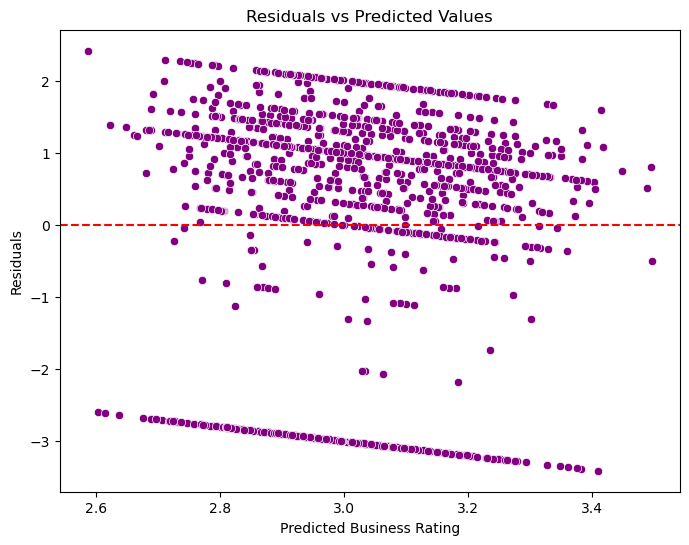

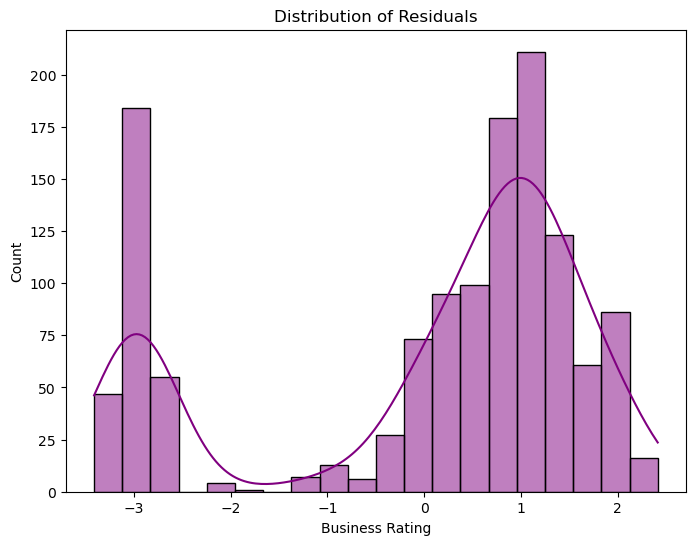

In [22]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))

# Residuals vs Predicted values
sns.scatterplot(x=y_pred, y=residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Business Rating')
plt.ylabel('Residuals')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title('Distribution of Residuals')
plt.show()
